In [3]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re


In [4]:
# Import data
data = pd.read_csv('./IMDB Dataset.csv',quotechar='"',on_bad_lines='skip')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Basic EDA

In [ ]:
data["sentiment"].value_counts()
# data["label"] = data["sentiment"].apply(lambda x: 1 if x == "Postive" else (0 if x =="Neutral" else -1))

,count
sentiment,
positive,25000
negative,25000


In [ ]:
pd.set_option('display.max_colwidth', None)
data["review"].sample()

,review
13061,"A great story, based on a true story about a young black man and all the difficulties along the road. Being that this is Denzel Washington's first ever movie that he himself was gonna direct, i have to admit i was a tad sceptical, but who wouldn't be..? But then again, he's a great actor with plently of years of experience, and the end result turned out great. The story is told in a great way, making you that has had difficulties during your childhood, and young adulthood, see yourself in those situations. So, it hits you hard, letting you know your not the only one going through hell. In all, a touching story about a young man trying to make it in this f***ed up world. (The story is based on the life of Antwone Fisher, born 3. August 1959, Cleveland, Ohio, USA, whom was also the writer of this movie) Strongly recommended. 8/10"


## Prepare the data

### Text Formatting

1. Remove unnecessary part (e.g. html strips, special character and noise text)


In [5]:
from bs4 import BeautifulSoup
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the noise:
def remove_parentheses(text):
    text = re.sub("\[[^]]*\]","",text)
    text = re.sub(r'\([^)]*\)', '', text)
    return text
# Removing special character
def remove_special_character(text):
    text = re.sub(r'[^A-Za-z0-9\s]','',text)
    return text

# Removing all
def remove_noise(text):
    text = strip_html(text)
    text = remove_parentheses(text)
    text = remove_special_character(text)
    return text
data['review_format']=data['review'].apply(remove_noise)

<ipython-input-5-3eedd71a36d6>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


### Normalization

2. Remove Stop Words & Lowercasing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
stop=stopwords.words('english')
data['review_normalization'] = data['review_format'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop))

data['review_normalization'].sample()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_normalization
17790,its always good feeling movie delivers goods w...


3. Stemmer

In [8]:
# Change word into stem
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()

def Stemmer_porter(text):
    stemmer_text = " ".join(porter.stem(word) for word in text.split())
    # stemmer_text = ' '.join(stemmer_text)
    return stemmer_text

data['review_normalization']=data['review_normalization'].apply(Stemmer_porter)
data['review_normalization'].head()

,review_normalization
0,one review mention watch 1 oz episod youll hoo...
1,a wonder littl product the film techniqu unass...
2,i thought wonder way spend time hot summer wee...
3,basic there famili littl boy think there zombi...
4,petter mattei love time money visual stun film...


In [36]:
data.sentiment = data.sentiment.map({"negative":0, "positive":1})
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.review_normalization,data.sentiment.values,random_state=1,test_size=0.2,shuffle=False)

4. Bag of words

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0.1,max_df=0.9,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(X_train)
#transformed test reviews
cv_test_reviews=cv.transform(X_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (40000, 141)
BOW_cv_test: (10000, 141)


In [14]:
print(cv.get_feature_names_out())


['act' 'actor' 'actual' 'almost' 'also' 'and' 'anoth' 'around' 'back'
 'bad' 'believ' 'best' 'better' 'big' 'bit' 'but' 'cant' 'cast' 'charact'
 'come' 'could' 'day' 'didnt' 'direct' 'director' 'doesnt' 'dont' 'effect'
 'end' 'enjoy' 'enough' 'even' 'ever' 'everi' 'fact' 'fan' 'feel' 'film'
 'find' 'first' 'funni' 'get' 'give' 'go' 'good' 'got' 'great' 'guy'
 'happen' 'he' 'howev' 'if' 'im' 'in' 'interest' 'it' 'ive' 'know' 'life'
 'like' 'line' 'littl' 'live' 'long' 'look' 'lot' 'love' 'made' 'make'
 'man' 'mani' 'may' 'minut' 'movi' 'much' 'music' 'must' 'need' 'never'
 'new' 'noth' 'old' 'one' 'origin' 'part' 'peopl' 'perform' 'person'
 'play' 'plot' 'point' 'pretti' 'put' 'quit' 'real' 'realli' 'reason'
 'right' 'role' 'saw' 'say' 'scene' 'script' 'see' 'seem' 'seen' 'set'
 'show' 'someth' 'star' 'start' 'still' 'stori' 'take' 'that' 'the'
 'there' 'thi' 'thing' 'think' 'though' 'thought' 'time' 'tri' 'turn'
 'two' 'us' 'use' 'want' 'watch' 'way' 'well' 'what' 'whole' 'without'
 'w

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(min_df=0.1,max_df=0.9,use_idf=True,norm='l2',smooth_idf=True)

In [16]:
X_train_T =tfidf.fit_transform(X_train)
X_test_T =tfidf.transform(X_test)

In [17]:
tfidf.get_feature_names_out()

array(['act', 'actor', 'actual', 'almost', 'also', 'and', 'anoth',
       'around', 'back', 'bad', 'believ', 'best', 'better', 'big', 'bit',
       'but', 'cant', 'cast', 'charact', 'come', 'could', 'day', 'didnt',
       'direct', 'director', 'doesnt', 'dont', 'effect', 'end', 'enjoy',
       'enough', 'even', 'ever', 'everi', 'fact', 'fan', 'feel', 'film',
       'find', 'first', 'funni', 'get', 'give', 'go', 'good', 'got',
       'great', 'guy', 'happen', 'he', 'howev', 'if', 'im', 'in',
       'interest', 'it', 'ive', 'know', 'life', 'like', 'line', 'littl',
       'live', 'long', 'look', 'lot', 'love', 'made', 'make', 'man',
       'mani', 'may', 'minut', 'movi', 'much', 'music', 'must', 'need',
       'never', 'new', 'noth', 'old', 'one', 'origin', 'part', 'peopl',
       'perform', 'person', 'play', 'plot', 'point', 'pretti', 'put',
       'quit', 'real', 'realli', 'reason', 'right', 'role', 'saw', 'say',
       'scene', 'script', 'see', 'seem', 'seen', 'set', 'show', 'someth',


In [18]:
feature = pd.DataFrame.sparse.from_spmatrix(X_train_T,
                                  index=X_train.index,
                                  columns=tfidf.get_feature_names_out())
feature.mean(axis=0)[-10:]

,0
well,0.040553
what,0.020538
whole,0.018168
without,0.018904
wonder,0.021839
work,0.031183
world,0.020935
would,0.047974
year,0.030066
young,0.020916


## Modeling

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from wordcloud import WordCloud,STOPWORDS
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

1. Logistic

In [42]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
lr_bow_predict=lr.predict(cv_test_reviews)
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(X_train_T,y_train)
lr_tfidf_predict=lr.predict(X_test_T)
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.7502
lr_tfidf_score : 0.7511


In [43]:
#Classification report for bag of words
lr_bow_report=classification_report(y_test,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(y_test,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.74      0.75      4993
    Negative       0.75      0.76      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.74      0.75      4993
    Negative       0.75      0.76      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [47]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3806 1201]
 [1297 3696]]
[[3803 1204]
 [1285 3708]]


2. Stochastic gradient descent or Linear support vector machines for bag of words and tfidf features



In [51]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,y_train)
svm_bow_predict=lr.predict(cv_test_reviews)
svm_bow_score=accuracy_score(y_test,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

#Fitting the model for tfidf features
svm_bow_tfidf=lr.fit(X_train_T,y_train)
svm_tfidf_predict=lr.predict(X_test_T)
svm_tfidf_score=accuracy_score(y_test,svm_tfidf_predict)
print("svm_tfidf_score :",lr_tfidf_score)


svm_bow_score : 0.751
svm_tfidf_score : 0.7511


In [52]:
#Classification report for bag of words
svm_bow_report=classification_report(y_test,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

#Classification report for tfidf features
svm_tfidf_report=classification_report(y_test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

              precision    recall  f1-score   support

    Positive       0.75      0.74      0.75      4993
    Negative       0.75      0.76      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [54]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(y_test,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(y_test,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3767 1240]
 [1250 3743]]
[[3803 1204]
 [1285 3708]]


In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_T,y_train)
print(svc.score(X_test_T, y_test))

0.01125


In [ ]:
from sklearn.linear_model import SGDClassifier
clf= SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.04
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       530
     Neutral       0.21      0.12      0.15       270
    Positive       0.00      0.00      0.00         0

    accuracy                           0.04       800
   macro avg       0.07      0.04      0.05       800
weighted avg       0.07      0.04      0.05       800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

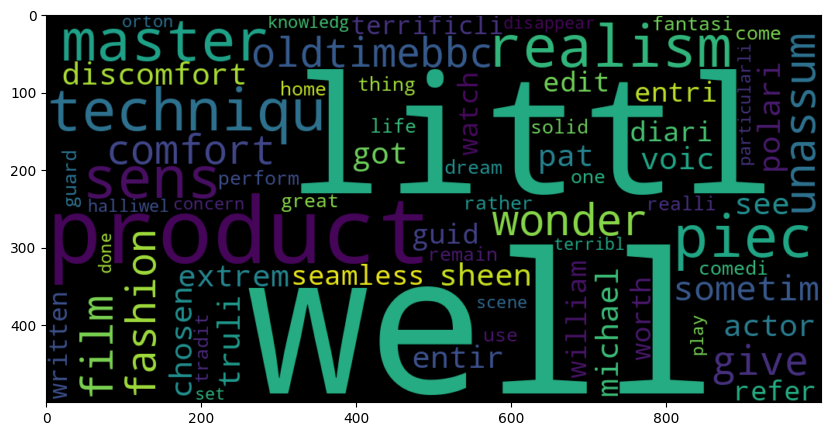

In [58]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=X_train[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show